In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io

In [73]:
file=scipy.io.loadmat('D:/ML Andrew Ngs/Week6/machine-learning-ex5/ex5/ex5data1.mat')

In [74]:
X=file['X']
Y=file['y']
Xval=file['Xval']
Yval=file['yval']
Xtest=file['Xtest'] # unseen X data
Ytest=file['ytest'] # unseen Y data

In [75]:
m,n=X.shape[0],X.shape[1]

In [76]:
# visulalizing the data

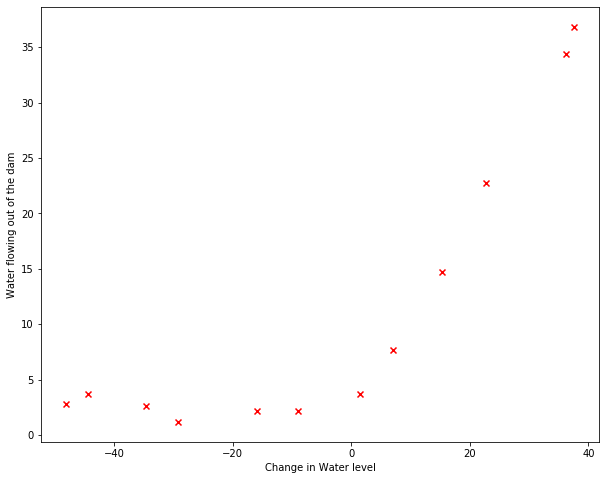

In [77]:
fig,ax=plt.subplots(figsize=(10,8))

ax.scatter(X,Y,marker='x',c='red')
ax.set_xlabel('Change in Water level')
ax.set_ylabel('Water flowing out of the dam')

ax.plot();

In [78]:
ones=np.ones((m,1))
X_new=np.hstack((ones,X))
theta=np.ones((n+1,1))
lamda=1

In [79]:
def lrCostfunction(theta,X,Y,lamda):
    '''Function will return regularized Cost function'''
    h=np.dot(X,theta)
    cost=1/(2*m)*np.sum((h - Y)**2)
    J=cost+lamda/(2*m)*(np.sum(theta[1:]**2))
    return(J)

In [80]:
def lrGradient(theta,X,Y,lamda):
    '''Function will return regularized Gradient'''
    h=np.dot(X,theta)
    err=h-Y
    grad=np.zeros((2,1))
    grad=(1/m)*(np.dot(X.T,err))
    grad[1:]=grad[1:]+(lamda/(m))*(theta[1:])
    return(grad)

In [81]:
int_cost=lrCostfunction(theta,X_new,Y,lamda)
int_grad=lrGradient(theta,X_new,Y,lamda)
print('Initial regularized cost is {} and Gradient is {}'.format(int_cost,int_grad))

Initial regularized cost is 303.9931922202643 and Gradient is [[-15.30301567]
 [598.25074417]]


In [82]:
def trainLinearReg(in_theta,X,Y,lamda):
    result = opt.fmin_tnc(func=lrCostfunction, x0=in_theta, fprime=lrGradient, args=(X,Y.flatten(),lamda))
    return(result[0].reshape((X.shape[1],1)))

In [83]:
optimised_theta=trainLinearReg(theta,X_new,Y,1)
print("value of optimised theta is {}".format(optimised_theta))

value of optimised theta is [[13.08771391]
 [ 0.36774199]]


In [84]:
# 2. Bias vs Variance

In [85]:
val_ones=np.ones((Xval.shape[0],1))
X_val=np.hstack((val_ones,Xval))

In [86]:
def Learningcurve(X,Y,Xval,Yval,lamda):
    train_err=[]
    cv_err=[]
    initial_theta=np.ones((X.shape[1],1))
    for i in range(1,X.shape[0]+1):
        theta_t=trainLinearReg(initial_theta,X[0:i,:],Y[0:i],lamda)
        train_err.append(lrCostfunction(theta_t,X[0:i,:],Y[0:i],lamda))
        cv_err.append(lrCostfunction(theta_t,Xval,Yval,lamda))
    return(train_err,cv_err)

In [87]:
# Polynomial features

In [88]:
def polyFeatures(X,p):
    '''Function returns adding polynomial features upto pth power'''
    for po in range(2,p+1):
        X=np.hstack((X,(X[:,0]**po).reshape((X.shape[0],1))))
    return(X)

In [89]:
X_poly=polyFeatures(X,8)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# Transforming the train set
X_poly=scaler.fit_transform(X_poly)
X_poly=np.hstack((np.ones((X_poly.shape[0],1)),X_poly))

# Transforming the validation set
X_poly_val=polyFeatures(Xval,8)
X_poly_val=scaler.transform(X_poly_val)
X_poly_val=np.hstack((np.ones((X_poly_val.shape[0],1)),X_poly_val))


In [91]:
# Plotting the poly regression line

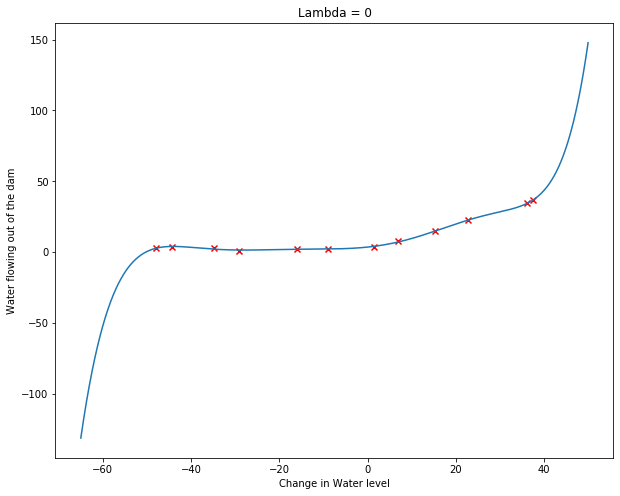

In [92]:
theta_poly=trainLinearReg(np.zeros((X_poly.shape[1],1)),X_poly,Y,0) # lambda = 0
 
fig,ax=plt.subplots(figsize=(10,8))

seg=2500 # evenly spaces

xx=np.linspace(-65,50,seg).reshape((seg,1))

xx_poly_value=polyFeatures(xx,8)
xx_poly_value=scaler.transform(xx_poly_value)
xx_poly_value=np.hstack((np.ones((xx_poly_value.shape[0],1)),xx_poly_value))

yy=np.dot(xx_poly_value,theta_poly)

ax.scatter(X,Y,marker='x',c='red')
ax.set_xlabel('Change in Water level')
ax.set_ylabel('Water flowing out of the dam')

ax.plot(xx,yy)
plt.title("Lambda = 0");

In [93]:
# Plotting Learning curve

In [97]:
err_train,err_cv=Learningcurve(X_poly,Y,X_poly_val,Yval,0)

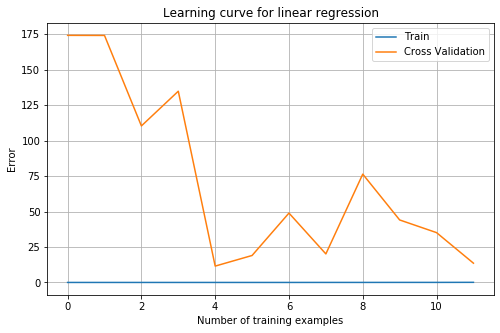

In [98]:
mym=list(range(12))
plt.figure(figsize=(8,5))
plt.plot(mym,err_train,label='Train')
plt.plot(mym,err_cv,label='Cross Validation')
plt.legend()
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.grid(True)